# Lab Two - Ecosystem Impacts

## *Analysis of Climate Impacts on Avian Wintering*

In this lab we learn part 2 basics of Python for data analysis through utilizing the Jupyter environment to analyze data. 

You will learn how to: 


- Use datetime objects
- Manipulate datetime objects (methods of datetime objects)
- Use datetime objects as an index in a Pandas dataframe
- Plot with error bars
- Create simple legends
- Continue to use indexing (boolean and normal) to look at data

By the end of this lab you should be able to: read in and create a datetime index for a Pandas dataframe, plot error bars

In this particular lab it's important to be running Python 3.6 - otherwise the modules will exhibit bad datetime behavior. 

Additional materials for reading: 
- More information on datetime objects: https://docs.python.org/2/library/datetime.html
- More information on datetime string formats: http://strftime.org/
- Igual & Seguí Chapter 2: Sections 2.6 to the end of Chapter 2

## *Review of Lab 1*

Last time we learned how to read in simple formatted csv files into pandas dataframes and manipulate those dataframes to plot. We also learned about boolean indexing. 

### Part A: Are there any questions about the homework or about that lab? 


----



### Part B: Some notes on the temperature anomaly dataset we used and you are using for your lab report. 

This dataset is one of the highlighted datasets in the National Climate Asssesment (3rd edition circa 2014). The fourth edition part 1 came out recently in 2017 (https://science2017.globalchange.gov/chapter/front-matter-about/). 

Please go to this link and scroll down to Figure 2.2 / 2.3. These are interactive, feel free to click around.
    https://nca2014.globalchange.gov/report/our-changing-climate/observed-change
    
Then go to the main source of this figure by Huber and Knutti, 2011 and look at Figure 3. 
    https://www.nature.com/articles/ngeo1327.pdf.  
    
How are these figures presented differently? What is important about how the 3rd edition of the NCA presented the same data? 

----


## *Part 1 - Importing New Temperature Dataset and Learning About Datetime Objects*

In this lab we will use mulitple datasets, one of which is similarly formatted to that in lab 1.

However instead of global temperature average anomalies we have the temperature anomalies for the 
lower 48 United States (excluding Hawaii & Alaska) and instead of by year, we have by month. 

Below we import the required packages in this lab and this dataset. 

In [193]:
#importing packages
import numpy as np               #for handling numbers w/ precision
import pandas as pd              #for handling dataframes
import matplotlib.pyplot as plt  #for plotting of datasets
import datetime as dt            #NEW IN THIS LAB - Importing the package datetime for 
                                 #datetime manipulation
import matplotlib.dates as mdt   #for manipulation of dates in matplotlib 

#setting up Jupyter environment so plots will be placed in the notebook
%matplotlib inline


#reading in NEW dataset of temperature anomaly data for lower 48 US States.

#note how to do a 'comment block' you can have three quotes rather than a hashtag
'''
Dataset description: 

Data source:
    https://www.ncdc.noaa.gov/cag/time-series/global/globe/land/ytd/12/1880-2017
    
Provided by NOAA National Center for Environmental Information

Global temperature anomaly data come from the Global Historical Climatology 
Network-Monthly (GHCN-M) data set and International Comprehensive Ocean-Atmosphere 
Data Set (ICOADS), which have data from 1880 to the present. 

This data is the timeseries of the lower 48 temperature anomalies calculated with respect to 
the 20th century average.
'''
temperVarUS = pd.read_csv('./Data/USAvrgTemp_ByMonth.txt', header = 4)

In [194]:
#let's look at what we just imported - can you remember the command for 
#looking at the first 5 rows?

#work with your lab partner to input that command below and once done 
#please flip your nametags up. 

#INPUT COMMAND BELOW TO PRINT OUT FIRST FIVE ROWS OF temperVarUS
#
#
#
#
#



Great - did you notice anything weird about the lefthand column called date now? It looks like years followed by months? What an annoying format. This is pretty common in climate/space data to have interesting date/time formats. One of the BEST packages Python has created to deal with this problem is the datetime package. We have imported this previously.

### Datetime Objects

But what IS a datetime object? Let's see! Go evaluate the next 4 cells - below

In [195]:
#please evaluate the following lines

#how to DEFINE and CREATE a datetime object manually

#inputs are year, month, day, then hour, minute, second
testDate =  dt.datetime(2005, 2, 1)

#this can also include TIME for example
testDateTime =  dt.datetime(2005, 3, 1, 10, 9, 8)

#these are in military time so 0 - 24 are hours, not AM / PM.

In [196]:
#you can find out different attributes of the datetime object using the following commands 
#for eaxmple

print(testDate.year, testDate.month, testDate.day)

print(testDateTime.hour, testDateTime.minute, testDateTime.second)


2005 2 1
10 9 8


In [197]:
#note what happens if you haven't DEFINED - it does not result in an error, but rather 
#print zero
print(testDate.minute, testDate.hour)

0 0


In [198]:
#there are also some additional useful effects like:

testTimeDelta = testDateTime - testDate
print(testTimeDelta)
print(type(testTimeDelta))


28 days, 10:09:08
<class 'datetime.timedelta'>


In [199]:
#that is a time delta object and results when subtracting two datetime objects. 
#You can do things to time deltas like:

print(testTimeDelta.total_seconds())
#the amount of seconds between the two times


2455748.0


In [200]:
#we could have ALSO defined a datetime from a string using the strip time method, for example

testDateString = '2005-10-2'

#format is datetime.strptime(date_string, format) 
newDateFromString = dt.datetime.strptime(testDateString, '%Y-%m-%d')
#format codes can be found in a link above under additional reading - but these DO include
#12 hour rather than military format
#this is super conveinent when reading in data

#lets see what that date looks like

print(newDateFromString)
print(type(newDateFromString))
#note the lack of time

#when you reach here please put up your nametag

2005-10-02 00:00:00
<class 'datetime.datetime'>


## Part 2 - Using Datetimes as Indexing in Pandas Dataframes

Now that we've learned about datetime objects lets go back to our imported data. The advantage of pandas dataframes
is the indexing behaivor. You can access parts of the dataframe using the .loc method we learned before, but the first command is the index, and the second command is the column. See how this works below. 

In [201]:
#within this cell please access using the .loc command into the Pandas dataframe temperVarUS
#print out at the index 2 and all the rows - work with your lab partner
#when you have done so please flip your name tags up

#ENTER COMMAND BELOW









Wouldn't it be nice to instead be able to ask for the data at a certain date? Or a certain range of dates?
To do that now we would have to use boolean indexing, when a date == a certain number then get the values. 
What if instead of the auto index, we could make the DATES the index???

In [202]:
#right now the index is - note how its a RangeIndex
print(temperVarUS.index)


RangeIndex(start=0, stop=1476, step=1)


In [203]:
#you can also do the following if you want an array. 
print(temperVarUS.index.values)

[   0    1    2 ..., 1473 1474 1475]


Pandas has a swanky command called pd.to_datetime
More info here https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html

Most of the time this a good go to command, but it can be a little tricky. Sometimes you will need
to convert data differently to datetime objects. But let's see what we can do with this.


In [204]:
#here we are creating a new variable tempVarUSDates

#we have set the infer command to false because we are TELLING it what format
#to use
tempVarUSDates   = pd.to_datetime(temperVarUS['Date'], infer_datetime_format = False, 
                                  format = '%Y%m')

In [205]:
#in this cell go ahead and print out the first five entries of tempVarUSDates

#ENTER PRINT COMMAND BELOW FOR FIRST FIVE






In [206]:
#so far so good now what happens if instead of the first five, you print
#out indexes 55 to 65?

#ENTER COMMAND BELOW FOR INDEXES 55 - 65







#once complete flip nametag up

This is a good thing to keep in mind when you are using these commands. Make sure to CHECK
how the datetimes are interepreted and how you are using the commands and format strings.

Now we want to set the index of our dataframe to the values. Please evaluate
the next cell. 

In [207]:
#to set the index to datetime

temperVarUS.index = tempVarUSDates

#and now we can go ahead and use datetimes - evaluate the next cells

In [208]:
print(temperVarUS.head())


              Date  Value  Anomaly
Date                              
1895-01-01  189501  26.69    -3.43
1895-02-01  189502  26.60    -7.22
1895-03-01  189503  39.97    -1.53
1895-04-01  189504  52.90     1.85
1895-05-01  189505  59.94    -0.26


In [209]:
print(temperVarUS.index)

DatetimeIndex(['1895-01-01', '1895-02-01', '1895-03-01', '1895-04-01',
               '1895-05-01', '1895-06-01', '1895-07-01', '1895-08-01',
               '1895-09-01', '1895-10-01',
               ...
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', name='Date', length=1476, freq=None)


In [210]:
#and all those swanky datetime methods
print(temperVarUS.index.month)

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', name='Date', length=1476)


In [211]:
#for example now we can use .loc to get the values at 2006, January

#NOTICE HERE that is AUTO assumed the day is the first of the month
#or the equivalent of 0 for datetime days

print(temperVarUS.loc[dt.datetime(2006, 1, 1), :])

Date       200601.00
Value          38.93
Anomaly         8.81
Name: 2006-01-01 00:00:00, dtype: float64


## Part 3 - Plotting Datetime Indexed Pandas Dataframes and Error

Lets import some more data here - please run the following cell

In [212]:
#this first dataset is the average wintering location for North American birds
#bird ranges over the last 40 years since 1966

#Data Summary Source - 
#https://www.epa.gov/climate-indicators/climate-change-indicators-bird-wintering-ranges
#Original report and compilation can be found at the Audobon Society website
#http://web4.audubon.org/bird/bacc/techreport.html

#each winter (mid Dec - early January) the Audobon society collect bird count and location
#of wintering habitats

birdRangeAvrg = pd.read_csv('./Data/birdRanges_40yearAvrg.csv', 
                              header = 6)

#the second dataset represents the bird species that went into the previous time series
#analysis with each species and summary data over previous 40 years

birdSpecies = pd.read_csv('./Data/birdSpecies.csv', 
                            header = 2)

#in the section below go ahead and look at the datasets


In [213]:
#ENTER COMMAND BELOW TO PRINT .head() OF THE birdRangeAvrg dataset





In [214]:
#ENTER COMMAND BELOW TO PRINT .columns() OF THE birdSpecies dataset





#flip nametag up when you have reached this point

### Let's convert the birdRangeAvrg index to Datetime Objects - use the following command in the next cell  

In [215]:
birdRangeAvrg.index   = pd.to_datetime(birdRangeAvrg['year'], box = False,
                                       infer_datetime_format = False, 
                                       format = '%Y')


#now go ahead and print the index below

#ENTER COMMAND BELOW TO PRINT INDEX OF birdRangeAvrg AND THE TYPE






Notice how all the months have set to January? This was assumed from the pd.to_datetime command, in this case the bird counts are counted in winter (between December and January) so this is OK but keep this in mind when you have year data.


Notice how the dataset has the confidence interval? In lecture we are going to continue learning about errors on datasets, for now let's quickly learn how to plot these errors. 

----

### Plotting with Error Bars and Datetimes

The following sections sets up a figure as we did in lab one just looking at the trend line.

#### Line Plot - No Error Bars

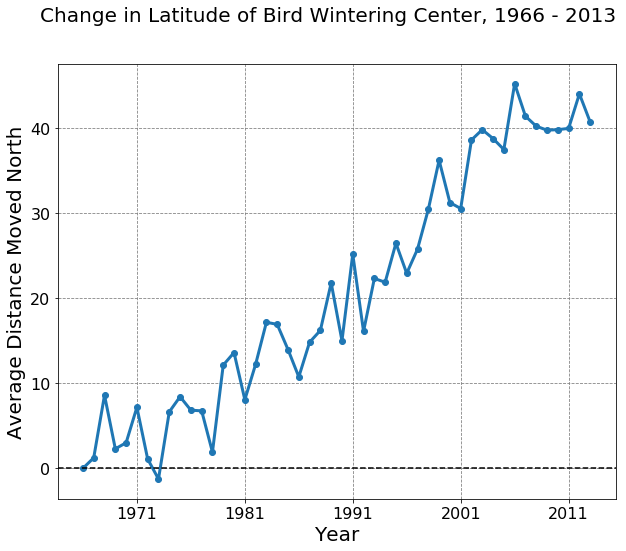

In [216]:
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Change in Latitude of Bird Wintering Center, 1966 - 2013', fontsize=20)

#note how we have to_pydatetime() here? This is in particular because 
#of a shift in pandas treating datetime objects
#between Python 2 and 3

#for plotting purposes please use the .index then to_pydatetime command
#more information can be found on the Pandas development github

plt.plot((birdRangeAvrg.index).to_pydatetime(), birdRangeAvrg['mean distance (miles)'], 
         lw = 3.0, marker = 'o')

plt.ylabel('Average Distance Moved North', fontsize = 20)
plt.xlabel('Year', fontsize = 20)

plt.xticks(fontsize=16) #make the xaxis labels larger
plt.yticks(fontsize=16) #make the yaxis labels larger
plt.axhline(y=0.0, color='k', linestyle='--') #add a horizontal line at 0

plt.grid(color='gray', linestyle='dashed') #add a grid so it's easier to tell if at zero


What can you see about the trend? 

In the next section we will plot with error bars included to represent the confidence interval.

#### Line Plot with Error Bars

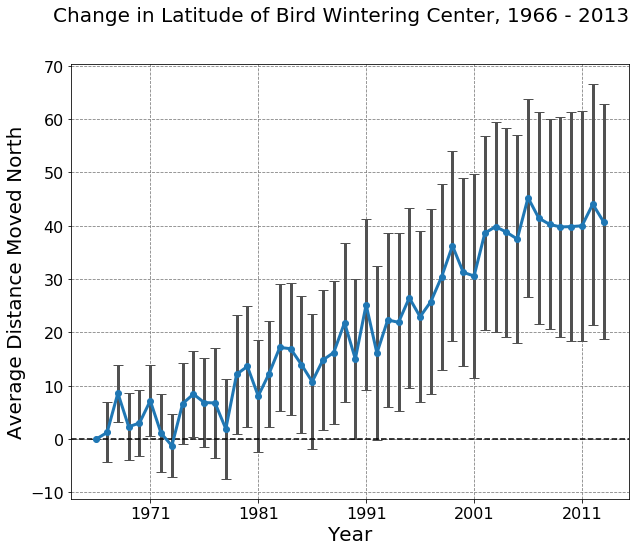

In [217]:
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Change in Latitude of Bird Wintering Center, 1966 - 2013', fontsize=20)


#more info here https://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html

#------------------------------------------NEW COMMAND

#the error bar plots only take differences between main points

lowerDiff = (birdRangeAvrg['mean distance (miles)'] - birdRangeAvrg['lower confidence (miles)']).values

upperDiff = (birdRangeAvrg['upper confidence (miles)'] - birdRangeAvrg['mean distance (miles)']).values
#notive the keyword arguments ONLY related to the error bars? 

plt.errorbar(birdRangeAvrg.index.to_pydatetime(), birdRangeAvrg['mean distance (miles)'], 
             lw = 3, marker = 'o', yerr = [lowerDiff, upperDiff], 
             capsize = 5, capthick = 1, ecolor = '#515151')
#-------------------------------------------

#this was the previous command
#plt.plot(birdRangeAvrg.index, birdRangeAvrg['mean distance (miles)'], lw = 3.0, marker = 'o')

plt.ylabel('Average Distance Moved North', fontsize = 20)
plt.xlabel('Year', fontsize = 20)

plt.xticks(fontsize=16) #make the xaxis labels larger
plt.yticks(fontsize=16) #make the yaxis labels larger
plt.axhline(y=0.0, color='k', linestyle='--') #add a horizontal line at 0

plt.grid(color='gray', linestyle='dashed') #add a grid so it's easier to tell if at zero

What do people think about this plot? Also lets look at what is EXACTLY going on in the 
command to get the error bars here. 

----











#### Line Plot with Error Envelope

Sometimes it's conveinent especially when you have a dense plot to present the confidence or range as an envelope. The following section does just that. 

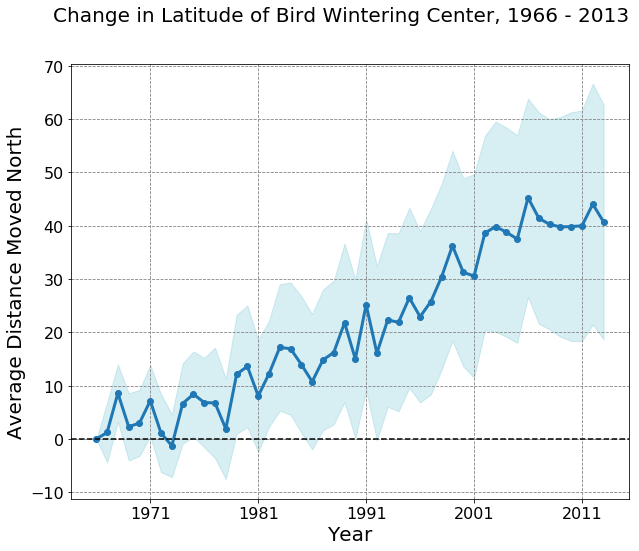

In [218]:
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Change in Latitude of Bird Wintering Center, 1966 - 2013', fontsize=20)


#--------------------------------this part has been updated
plt.plot(birdRangeAvrg.index.to_pydatetime(), 
         birdRangeAvrg['mean distance (miles)'], lw = 3, marker = 'o') # main line

#plt.plot(birdRangeAvrg.index.to_pydatetime(), birdRangeAvrg['upper confidence (miles)'], 
#         lw = 3, alpha = 0.6, color = '#39AEC2')
#plt.plot(birdRangeAvrg.index.to_pydatetime(), birdRangeAvrg['lower confidence (miles)'], 
#         lw = 3, alpha = 0.6, color = '#39AEC2')

#fill in region between the two boundary lines, notice how it's not the difference like in the 
#error bars? Also, the alpha command addition?
plt.fill_between(birdRangeAvrg.index.to_pydatetime(), birdRangeAvrg['lower confidence (miles)'], 
                 birdRangeAvrg['upper confidence (miles)'], alpha = 0.2, color = '#39AEC2')
#--------------------------------



plt.ylabel('Average Distance Moved North', fontsize = 20)
plt.xlabel('Year', fontsize = 20)

plt.xticks(fontsize=16) #make the xaxis labels larger
plt.yticks(fontsize=16) #make the yaxis labels larger
plt.axhline(y=0.0, color='k', linestyle='--') #add a horizontal line at 0

plt.grid(color='gray', linestyle='dashed') #add a grid so it's easier to tell if at zero

What do we think about this one? Easier to see the error? Now try uncommenting the other two plotting lines in the previous cell. Turn on and off the boundary lines. Do you like it better with those on or off?

## Part 4 - Plotting Multi-Plots with Datetime

Remember all those datasets we imported? Wasn't one of them the temperature changes with month in the lower 48 states? We know the bird count occured between December and January. Maybe it would be informative to plot both of these on the same page! 

(but not the same plot because messy messy plots + confusing)

In the section below we learn about mulitplotting. 

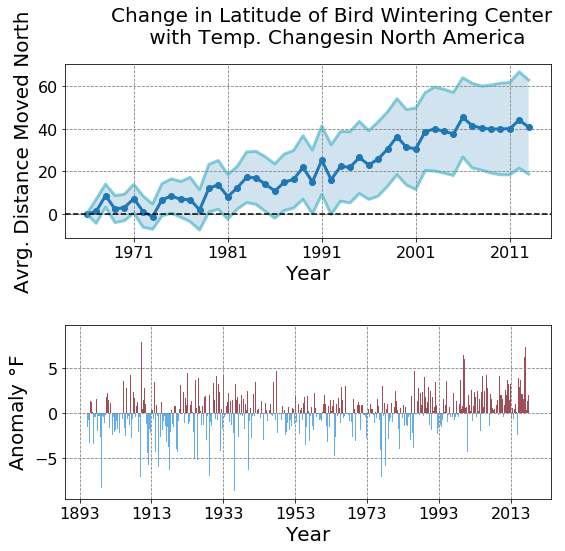

In [219]:
#let's set up a multiple plot panel

fig = plt.figure(figsize=(10, 8))
#added newline character to make multilevel title
fig.suptitle('Change in Latitude of Bird Wintering Center \n with Temp. Changes'+
             'in North America', fontsize=20)

#-----------------------------------------Check out the new format....now we have axes objects
gs = plt.GridSpec(2, 1, hspace=0.5, wspace=0.0, right = 0.8)

ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1,:])

ax1.plot(birdRangeAvrg.index.to_pydatetime(), birdRangeAvrg['mean distance (miles)'],    
         lw = 3, marker = 'o') # main line
ax1.plot(birdRangeAvrg.index.to_pydatetime(), birdRangeAvrg['upper confidence (miles)'], 
         lw = 3, alpha = 0.6, color = '#39AEC2')
ax1.plot(birdRangeAvrg.index.to_pydatetime(), birdRangeAvrg['lower confidence (miles)'], 
         lw = 3, alpha = 0.6, color = '#39AEC2')


#notice how our axis now can each have their own labels and how the command is different?
ax1.set_ylabel('Avrg. Distance Moved North', fontsize = 20)
ax1.set_xlabel('Year', fontsize = 20)

ax1.axhline(y=0.0, color='k', linestyle='--') #add a horizontal line at 0

ax1.fill_between(birdRangeAvrg.index.to_pydatetime(), 
                 birdRangeAvrg['lower confidence (miles)'], 
                 birdRangeAvrg['upper confidence (miles)'], alpha = 0.2)

ax1.grid(color='gray', linestyle='dashed')
ax1.tick_params(labelsize=16) #make the tick labels


#now let's add something to plot two 

#remember what we did before with the colors? We are doing that again here

booleanIndex = temperVarUS['Anomaly'] > 0
temperVarUS['Colors'] = 'k'
temperVarUS.loc[booleanIndex, 'Colors']  = '#9F4E58' 
temperVarUS.loc[~booleanIndex, 'Colors'] = '#64ACEA'

#set width to arbitray 30 for illustration purposes - 
ax2.bar(temperVarUS.index.to_pydatetime(), temperVarUS['Anomaly'], width = 30, align='edge', 
        color = temperVarUS['Colors'])
#ax2.plot(temperVarUS.index, temperVarUS['Anomaly'], lw = 2, marker = 'o')


ax2.set_ylabel('Anomaly $\degree$F', fontsize = 20)
ax2.set_xlabel('Year', fontsize = 20)

ax2.grid(color='gray', linestyle='dashed')

ax2.tick_params(labelsize=16)
#-----------------------------------------


What are some immediate issues with this???







#### Next plot - shared axis and with same range and subset of anomaly data for only January in year


[]

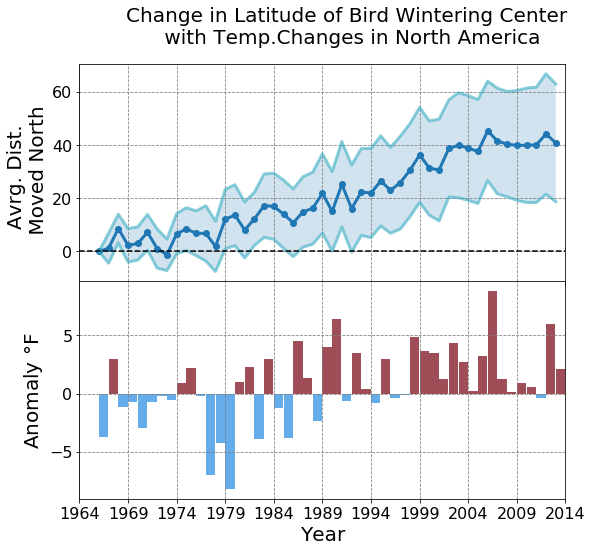

In [220]:


fig = plt.figure(figsize=(10, 8))
#added newline character to make multilevel title
fig.suptitle('Change in Latitude of Bird Wintering Center \n with Temp.'+ 
             'Changes in North America', fontsize=20)

#-----------------------------------------CHANGE REDUCED hspace to 0
gs = plt.GridSpec(2, 1, hspace=0.0, wspace=0.0, right = 0.8)
#-----------------------------------------
ax1 = fig.add_subplot(gs[0,:])
ax2 = fig.add_subplot(gs[1,:])

ax1.plot(birdRangeAvrg.index.to_pydatetime(), birdRangeAvrg['mean distance (miles)'],    
         lw = 3, marker = 'o') # main line
ax1.plot(birdRangeAvrg.index.to_pydatetime(), birdRangeAvrg['upper confidence (miles)'], 
         lw = 3, alpha = 0.6, color = '#39AEC2')
ax1.plot(birdRangeAvrg.index.to_pydatetime(), birdRangeAvrg['lower confidence (miles)'], 
         lw = 3, alpha = 0.6, color = '#39AEC2')


#notice how our axis now can each have their own labels and how the command is different?
ax1.set_ylabel('Avrg. Dist. \n Moved North', fontsize = 20)
#ax1.set_xlabel('Year', fontsize = 20) - REMOVED

ax1.axhline(y=0.0, color='k', linestyle='--') #add a horizontal line at 0

ax1.fill_between(birdRangeAvrg.index.to_pydatetime(), 
                 birdRangeAvrg['lower confidence (miles)'], 
                 birdRangeAvrg['upper confidence (miles)'], alpha = 0.2)

ax1.grid(color='gray', linestyle='dashed')
ax1.tick_params(labelsize=16) #make the tick labels


#now let's add to plot two - remember before how we had a super long date axis?
#well now we are sharing the axis...how about we do just the same date range?

#remember how we spent so long on the datetime axis? Our bird data has been set to
#dates of January within the year collected, we know that the data was collected in 
#December/January so how about we use .loc with that index?

#check out the following command with indexing - see how we are using the birdRangeAvrg.index? 
#to only get the index for January within the active years?

#---------------------------------------------------CHANGE INDEXING
#width in this case appears to be normalized to days
ax2.bar(temperVarUS.loc[birdRangeAvrg.index, :].index.to_pydatetime(), 
        temperVarUS.loc[birdRangeAvrg.index, 'Anomaly'], 
        width = 350, align='edge', color = temperVarUS.loc[birdRangeAvrg.index, 'Colors'])
#---------------------------------------------------

ax2.set_ylabel('Anomaly $\degree$F', fontsize = 20)
ax2.set_xlabel('Year', fontsize = 20)

ax2.grid(color='gray', linestyle='dashed')

ax2.tick_params(labelsize=16)


#IMPORTANT!!!!
#CHANGE------------------------------------
#when doing multiplots with hidden axis MAKE SURE to always set the limits of the axis for
#all axis so that the plots don't un-sync - try switching out these datetime objects for
#other dates can be misleading

ax1.set_xlim([dt.datetime(1964, 1, 1), dt.datetime(2014, 1, 1)])
ax2.set_xlim([dt.datetime(1964, 1, 1), dt.datetime(2014, 1, 1)])


#note - if the axis on the upper plot starts to poke out - you can turn this off
#with the following command
ax1.set_xticklabels([])
#-----------------------------------------

This is a simple multiplot. In future labs we will learn how to subset the axis to skip every other year, and legend placement. For now though sometimes it's useful to add another plot but NOT have the same axis. In this case let's use that third dataset - the main changes in the following function will be to add another plot but of a different dataset, rather than time series we will use the species data we loaded in above. 

## Part 5 - Plotting Multiplots with Different Types of Data (Time Series etc)

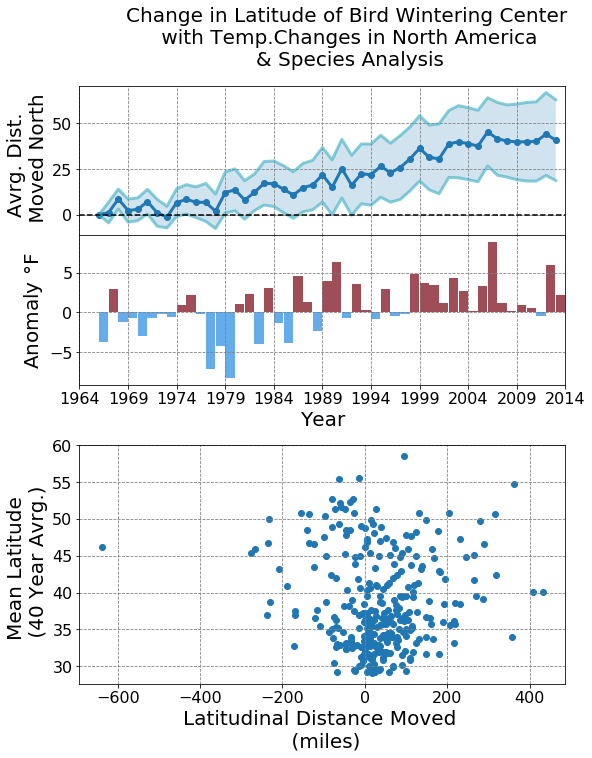

In [221]:
fig = plt.figure(figsize=(10, 11))

fig.suptitle('Change in Latitude of Bird Wintering Center \n with Temp.'+ 
             'Changes in North America \n' +
             '& Species Analysis', fontsize=20)

#-----------------------------------------CHANGE TWO GRIDSPACE

#created two grids - one that divides into quarters and one by halfs
#notice the different hspace
gs_upper = plt.GridSpec(4, 1, hspace=0.0, wspace=0.0, right = 0.8)
gs_lower = plt.GridSpec(2, 1, hspace=0.5, wspace=0.0, right = 0.8)

#creating ax1 and ax2 for upper plots
ax1 = fig.add_subplot(gs_upper[0,:])
ax2 = fig.add_subplot(gs_upper[1,:])

#creating ax3 for lower plot
ax3 = fig.add_subplot(gs_lower[1,:])
#-------------------------------------------

#this is all the same as the above plot again
ax1.plot(birdRangeAvrg.index.to_pydatetime(), birdRangeAvrg['mean distance (miles)'],    
         lw = 3, marker = 'o') # main line
ax1.plot(birdRangeAvrg.index.to_pydatetime(), birdRangeAvrg['upper confidence (miles)'], 
         lw = 3, alpha = 0.6, color = '#39AEC2')
ax1.plot(birdRangeAvrg.index.to_pydatetime(), birdRangeAvrg['lower confidence (miles)'], 
         lw = 3, alpha = 0.6, color = '#39AEC2')


#notice how our axis now can each have their own labels and how the command is different?
ax1.set_ylabel('Avrg. Dist. \n Moved North', fontsize = 20)
#ax1.set_xlabel('Year', fontsize = 20) - REMOVED

ax1.axhline(y=0.0, color='k', linestyle='--') #add a horizontal line at 0

ax1.fill_between(birdRangeAvrg.index.to_pydatetime(), birdRangeAvrg['lower confidence (miles)'], 
                 birdRangeAvrg['upper confidence (miles)'], alpha = 0.2)

ax1.grid(color='gray', linestyle='dashed')
ax1.tick_params(labelsize=16) #make the tick labels


#now let's add to plot two - remember before how we had a super long date axis?
#well now we are sharing the axis...how about we do just the same date range?

#remember how we spent so long on the datetime axis? Our bird data has been set to
#dates of January within the year collected, we know that the data was collected in 
#December/January so how about we use .loc with that index?

#check out the following command with indexing - see how we are using the birdRangeAvrg.index? 
#to only get the index for January within the active years?

#width in this case appears to be normalized to days
ax2.bar(temperVarUS.loc[birdRangeAvrg.index, :].index.to_pydatetime(), 
        temperVarUS.loc[birdRangeAvrg.index, 'Anomaly'], 
        width = 350, align='edge', color = temperVarUS.loc[birdRangeAvrg.index, 'Colors'])

ax2.set_ylabel('Anomaly $\degree$F', fontsize = 20)
ax2.set_xlabel('Year', fontsize = 20)

ax2.grid(color='gray', linestyle='dashed')

ax2.tick_params(labelsize=16)


#IMPORTANT!!!!
#when doing multiplots with hidden axis MAKE SURE to always set the limits of the axis for
#all axis so that the plots don't un-sync - try switching out these datetime 
#objects for other dates can be misleading
ax1.set_xlim([dt.datetime(1964, 1, 1), dt.datetime(2014, 1, 1)])
ax2.set_xlim([dt.datetime(1964, 1, 1), dt.datetime(2014, 1, 1)])


#note - if the axis on the upper plot starts to poke out - you can turn this off
#with the following command
ax1.set_xticklabels([])


#AND NOW for the third axis

#---------------ADDED
ax3.scatter(birdSpecies['Latitudinal distance moved (miles)'], 
            birdSpecies['Mean latitude (40-year ave from regression)'])

ax3.set_xlabel('Latitudinal Distance Moved \n (miles)', fontsize = 20)
ax3.set_ylabel('Mean Latitude \n (40 Year Avrg.)', fontsize = 20)

ax3.grid(color='gray', linestyle='dashed')
ax3.tick_params(labelsize=16) 
#-----------------

### Let's make that last plot a bit more approachable - 

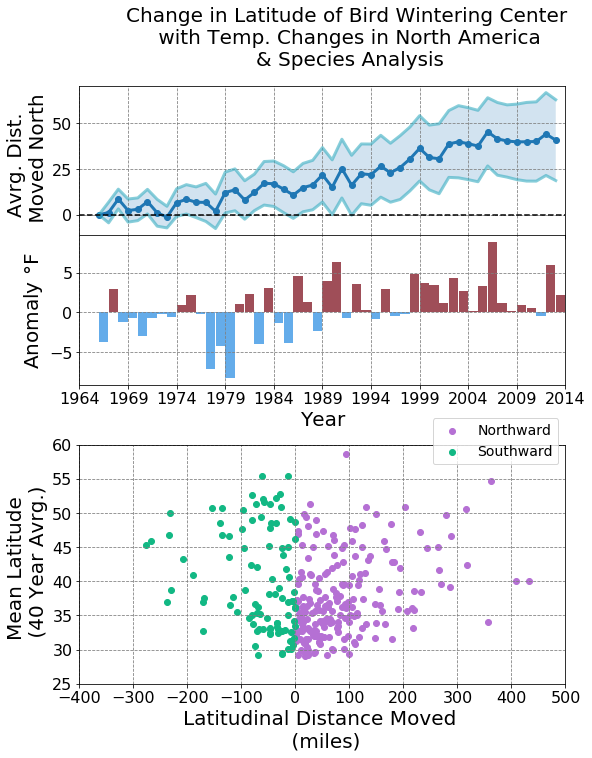

In [222]:
fig = plt.figure(figsize=(10, 11))

fig.suptitle('Change in Latitude of Bird Wintering Center \n with Temp.'+
             'Changes in North America \n' +
             '& Species Analysis', fontsize=20)


#created two grids - one that divides into quarters and one by halfs
#notice the different hspace
gs_upper = plt.GridSpec(4, 1, hspace=0.0, wspace=0.0, right = 0.8)
gs_lower = plt.GridSpec(2, 1, hspace=0.5, wspace=0.0, right = 0.8)

#creating ax1 and ax2 for upper plots
ax1 = fig.add_subplot(gs_upper[0,:])
ax2 = fig.add_subplot(gs_upper[1,:])

#creating ax3 for lower plot
ax3 = fig.add_subplot(gs_lower[1,:])

#this is all the same as the above plot again
ax1.plot(birdRangeAvrg.index.to_pydatetime(), birdRangeAvrg['mean distance (miles)'],    
         lw = 3, marker = 'o') # main line
ax1.plot(birdRangeAvrg.index.to_pydatetime(), birdRangeAvrg['upper confidence (miles)'], 
         lw = 3, alpha = 0.6, color = '#39AEC2')
ax1.plot(birdRangeAvrg.index.to_pydatetime(), birdRangeAvrg['lower confidence (miles)'], 
         lw = 3, alpha = 0.6, color = '#39AEC2')


#notice how our axis now can each have their own labels and how the command is different?
ax1.set_ylabel('Avrg. Dist. \n Moved North', fontsize = 20)
#ax1.set_xlabel('Year', fontsize = 20) - REMOVED

ax1.axhline(y=0.0, color='k', linestyle='--') #add a horizontal line at 0

ax1.fill_between(birdRangeAvrg.index.to_pydatetime(), 
                 birdRangeAvrg['lower confidence (miles)'], 
                 birdRangeAvrg['upper confidence (miles)'], alpha = 0.2)

ax1.grid(color='gray', linestyle='dashed')
ax1.tick_params(labelsize=16) #make the tick labels


#now let's add to plot two - remember before how we had a super long date axis?
#well now we are sharing the axis...how about we do just the same date range?

#remember how we spent so long on the datetime axis? Our bird data has been set to
#dates of January within the year collected, we know that the data was collected in 
#December/January so how about we use .loc with that index?

#check out the following command with indexing - see how we are using the birdRangeAvrg.index? 
#to only get the index for January within the active years?

#width in this case appears to be normalized to days
ax2.bar(temperVarUS.loc[birdRangeAvrg.index, :].index.to_pydatetime(), 
        temperVarUS.loc[birdRangeAvrg.index, 'Anomaly'], 
        width = 350, align='edge', color = temperVarUS.loc[birdRangeAvrg.index, 'Colors'])

ax2.set_ylabel('Anomaly $\degree$F', fontsize = 20)
ax2.set_xlabel('Year', fontsize = 20)

ax2.grid(color='gray', linestyle='dashed')

ax2.tick_params(labelsize=16)


#IMPORTANT!!!!
#when doing multiplots with hidden axis MAKE SURE to always set the limits of the axis for
#all axis so that the plots don't un-sync - try switching out these datetime objects for 
#other dates can be misleading
ax1.set_xlim([dt.datetime(1964, 1, 1), dt.datetime(2014, 1, 1)])
ax2.set_xlim([dt.datetime(1964, 1, 1), dt.datetime(2014, 1, 1)])


#note - if the axis on the upper plot starts to poke out - you can turn this off
#with the following command
ax1.set_xticklabels([])


#AND NOW for the third axis

#---------------ADDED COLORS AND LEGEND with indexing

#the label command syncs to the legend

indexN = (birdSpecies['Lat. direction moved'] == 'N')

ax3.scatter(birdSpecies.loc[indexN, 'Latitudinal distance moved (miles)'], 
            birdSpecies.loc[indexN, 'Mean latitude (40-year ave from regression)'], 
            color = '#B570D4', label = 'Northward')

ax3.scatter(birdSpecies.loc[~indexN, 'Latitudinal distance moved (miles)'], 
            birdSpecies.loc[~indexN, 'Mean latitude (40-year ave from regression)'], 
            color = '#12B884', label = 'Southward')

ax3.set_xlabel('Latitudinal Distance Moved \n (miles)', fontsize = 20)
ax3.set_ylabel('Mean Latitude \n (40 Year Avrg.)', fontsize = 20)

#note how we set the limits
ax3.set_xlim([-400, 500])
ax3.set_ylim([25, 60])

#and setting up legend

#command in here is where the legend is placed.
#more info here: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html

#bbox sets location
#prop sets fontsize

#make sure to never overplot legend on data

#x and yin inches - requires labels in the plotting
#commands to label 
ax3.legend(bbox_to_anchor=(1, 1.14), prop={'size':14})
#-----------------
ax3.grid(color='gray', linestyle='dashed')
ax3.tick_params(labelsize=16) 

# SUMMARY

From this lab you have learned the basics of subplots, scatterplots, datetime structures, and legends. 

We have also learned about more about access a pandas data frame through boolean indexing and through normal indexing. 

Homework: 
Please complete homework 2 located in the file folder - due in 1.5 weeks on Friday the 26th. Reminder - office hours for this will be held on Thursdays and the first lab report is due THIS Friday the 19th. 

In the next few weeks we will start doing more data manipulation and statistics in lab building off the lecture series.

This homework should take no more than 5-6 hours but you should start early in case you have any questions or run into issues!

Some final notes - there are many ways to subplot. Through this class we will try to demonstrate most of the most popular ones -  